In [8]:
import cv2
import numpy as np
import os
import random

def read_data_and_split(split_seed, train_ratio, is_normalize=True):
    """read data into np array, normalize it and train test split
    split_seed: set seed for same train test split
    train_ratio: ratio of training set. range from 0 to 1
    is_normalize: True for normalizr to -1 to 1
    
    return np array with x_train, x_test, y_train, y_test
    """
    
    idx = next(os.walk('/data/jimmy15923/cg_kidney_seg/train'))[1]
    # remove two file with different size between image & mask
    idx.remove("S2016-30816_9_0")
    idx.remove("S2016-30816_9_1")
    
    # set seed
    random.seed(split_seed)
    random.shuffle(idx)
    
    train_idx, test_idx = idx[:int(len(idx)*train_ratio)], idx[int(len(idx)*train_ratio):]

    x_train = np.array([cv2.imread('/data/jimmy15923/cg_kidney_seg/train/{}/image/{}_slide.jpg'.format(x, x))[...,::-1]\
                    for x in train_idx], dtype="float32")
    x_test = np.array([cv2.imread('/data/jimmy15923/cg_kidney_seg/train/{}/image/{}_slide.jpg'.format(x, x))[...,::-1]\
                       for x in test_idx], dtype="float32")
    
    if is_normalize:
        x_train = (x_train / 127.5) - 1
        x_test = (x_test / 127.5) - 1
        
    y_train = np.array([cv2.imread('/data/jimmy15923/cg_kidney_seg/train/{}/mask/{}_mask.jpg'.format(x, x))[..., 0]\
                    for x in train_idx])
    
    y_test = np.array([cv2.imread('/data/jimmy15923/cg_kidney_seg/train/{}/mask/{}_mask.jpg'.format(x, x))[..., 0]\
                        for x in test_idx])
    
    y_train = y_train.astype(np.bool)*1
    y_test = y_test.astype(np.bool)*1
    
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = read_data_and_split(split_seed=7, train_ratio=0.8, is_normalize=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(733, 1000, 1000, 3)
(184, 1000, 1000, 3)
(733, 1000, 1000)
(184, 1000, 1000)


In [9]:
y = np.append(y_train, y_test, axis=0)

In [60]:
import pandas as pd

In [47]:
pixel_list = []
for i in range(len(y)):
    n = np.sum(y[i]) / (1000*1000 )
    pixel_list.append(n)

(array([366., 300., 152.,  63.,  22.,   9.,   1.,   2.,   1.,   1.]),
 array([7.600000e-05, 2.051060e-02, 4.094520e-02, 6.137980e-02,
        8.181440e-02, 1.022490e-01, 1.226836e-01, 1.431182e-01,
        1.635528e-01, 1.839874e-01, 2.044220e-01]),
 <a list of 10 Patch objects>)

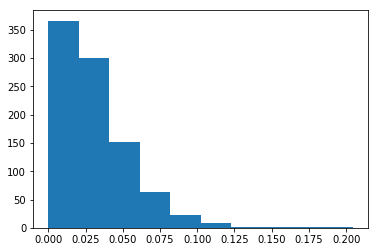

In [48]:
import matplotlib.pyplot as plt
plt.hist(pixel_list)

In [49]:
t = np.array(pixel_list)

In [59]:
t[t<0.005].shape

(112,)

In [61]:
idx = next(os.walk('/data/jimmy15923/cg_kidney_seg/train'))[1]
# remove two file with different size between image & mask
idx.remove("S2016-30816_9_0")
idx.remove("S2016-30816_9_1")

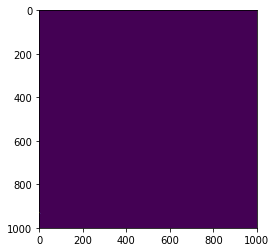

In [105]:
x = idx[369]
see = cv2.imread('/data/jimmy15923/cg_kidney_seg/train/{}/mask/{}_mask.jpg'.format(x, x))[:,:,0]
plt.imshow(see)

In [108]:
see[see >0]

array([ 10,  10,   8,   7,  10,   4,   7,  15,  16,   2,  27,  12, 255,
         5,  18,  14, 254, 255,   4,  25, 236, 255, 251,   9,  13, 255,
       255, 254, 254,   1,   8, 251, 254, 250, 255,   1,   7, 254, 255,
       248, 255, 255,   3, 254, 255, 255, 253, 249,  13, 255, 226, 255,
       255,   6,   2, 247, 255, 255,   4,   8,  15,   9,   6,  13,   7,
        12,   2,  18,   5,  15,   2,   5,  18,   5,   5,  12], dtype=uint8)

In [95]:
bo = see.astype(np.bool)

In [96]:
np.where(bo == 1)

(array([920, 920, 920, 920, 921, 921, 921, 921, 922, 922, 922, 922, 923,
        923, 923, 923, 924, 924, 924, 924, 925, 925, 925, 925, 925, 926,
        926, 926, 926, 926, 926, 927, 927, 927, 927, 927, 927, 928, 928,
        928, 928, 928, 928, 929, 929, 929, 929, 929, 929, 930, 930, 930,
        930, 930, 930, 931, 931, 931, 931, 931, 931, 932, 932, 932, 933,
        933, 933, 933, 933, 934, 934, 934, 935, 935, 935, 935]),
 array([1, 4, 5, 7, 0, 2, 3, 6, 1, 3, 4, 6, 0, 2, 5, 7, 0, 1, 2, 4, 0, 1,
        2, 6, 7, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 6, 7, 0, 1, 2, 3, 4, 7, 0,
        1, 2, 3, 4, 6, 0, 1, 2, 3, 4, 7, 0, 1, 2, 3, 5, 7, 0, 1, 4, 1, 3,
        5, 6, 7, 0, 5, 7, 1, 3, 4, 6]))

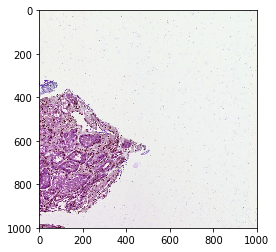

In [81]:
img = cv2.imread('/data/jimmy15923/cg_kidney_seg/train/{}/image/{}_slide.jpg'.format(x, x))
plt.imshow(img)

In [110]:
test = [np.sum(cv2.imread('/data/jimmy15923/cg_kidney_seg/train/{}/mask/{}_mask.jpg'.format(x, x))[:,:,0].astype(np.bool)) for x in idx]

In [76]:
np.min(np.array(test))

369

In [118]:
df = pd.DataFrame(
    {"image_path":['/data/jimmy15923/cg_kidney_seg/train/{}/image/{}_slide.jpg'.format(x, x) for x in idx],
     "mask_path":['/data/jimmy15923/cg_kidney_seg/train/{}/mask/{}_mask.jpg'.format(x, x) for x in idx],
     "n_mask_pixel":test})

In [120]:
df['pixel_percentage'] = df.n_mask_pixel / (10000)

In [122]:
df.to_csv("/data/jimmy15923/cg_kidney_seg/cgmh_data_list.csv", index=False)